# Data Structures and Processing

## Week3: NumPy, and Matplotlib

In [1]:
import numpy as np
from typing import Union

### Task 1: Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [9]:
def heaviside(num: Union[int, float]):
    if num >0:
        return 1
    else:
        return 0




1
1
1
1


In [10]:
assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

Extend the `heaviside` function to handle the `ndarray`.

In [12]:
# Your solution to extend the heaviside function to handle `ndarray` goes here.
def heaviside(num: Union[int, float, np.ndarray]):
    if isinstance(num, (int, float)):
        return int(num > 0)
    elif isinstance(num, np.ndarray) and (num.dtype == int or num.dtype == float):
        return (num > 0).astype(int)
    else:
        raise TypeError("Input must be an integer, float, or ndarray with dtype int or float")

# Test cases
print(heaviside(5))                  # Output: 1
print(heaviside(np.array([-1, 2, 0]))) # Output: [0 1 0]
print(heaviside(3.14))               # Output: 1



1
[0 1 0]
1


In [13]:
assert np.all(heaviside(np.array([-1.2, 0.2, 3])) == np.array([0, 1, 1]))

### Task 2: Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [14]:
def mean_squared_values(arr: np.ndarray):
    squared_arr = np.square(arr)  # Square each element of the array
    mean_squared = np.mean(squared_arr)  # Calculate the mean of the squared values
    return mean_squared



11.0


In [15]:
import numpy as np
x_utest = np.arange(10)
assert mean_squared_values(x_utest) == 28.5

### Task 3: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1: Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array. You can use either `np.loadtxt` or `pandas.read_csv` here.

In [29]:
def read_values(filename: str, index: int):
    data = np.loadtxt(filename, delimiter=',')
    
    index_values = data[:, index]
    
    return index_values
# Test example
filename = 'data.txt' 
index = 0
index_values = read_values(filename, index)
print(index_values)


[-1.9142 -1.8918 -1.3978 -1.382  -1.2789 -0.9405 -0.9159 -0.9139 -0.668
 -0.5575 -0.4231 -0.4084 -0.4001 -0.2533 -0.0993  0.2214  0.2642  0.4028
  0.4189  0.596   0.6265  0.8675  0.8837  0.9667  1.04    1.0471  1.115
  1.7697  1.814 ]


In [27]:
import numpy as np

def read_values(filename: str, index_column: int) -> np.ndarray:
    # Load the  file using np.loadtxt
    data = np.loadtxt(filename, delimiter=',')
    
    # Extract the specified index column using array indexing
    index_values = data[:, index_column]
    
    return index_values

# Test example
filename = 'data.txt' 
index_column = 0  # Specify the index of the column you want to extract

index_values = read_values(filename, index_column)
print(index_values)


[-1.9142 -1.8918 -1.3978 -1.382  -1.2789 -0.9405 -0.9159 -0.9139 -0.668
 -0.5575 -0.4231 -0.4084 -0.4001 -0.2533 -0.0993  0.2214  0.2642  0.4028
  0.4189  0.596   0.6265  0.8675  0.8837  0.9667  1.04    1.0471  1.115
  1.7697  1.814 ]


In [31]:
import numpy as np
first_five = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
assert np.allclose(read_values("data.txt", 0)[:5], first_five)

Use your function to read in values to two variables `x_values` and `y_values`.

In [32]:
x_values = read_values(filename, 0)
y_values = read_values(filename,1)

In [33]:
first_five_x = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(x_values[:5], first_five_x)
assert np.allclose(y_values[:5], first_five_y)

### Step 2: Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [34]:
y_values = np.exp(y_values)

In [35]:
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_values[:5], np.exp(first_five_y))

#### Step 3: Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

In [38]:
import matplotlib.pyplot as plt


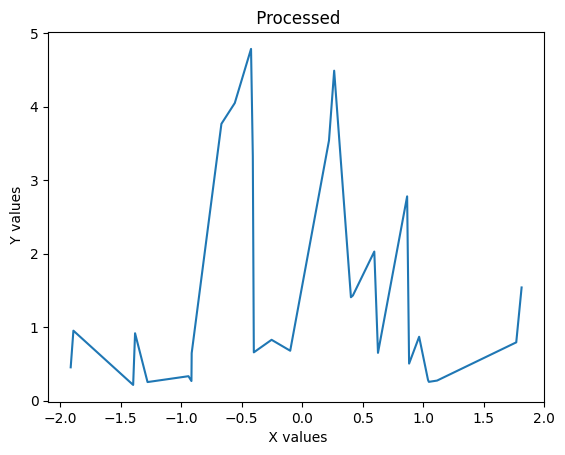

In [41]:
# Your solution to plot goes here
plt.plot(x_values, y_values, label  = "bo")
plt.xlabel(" X values")
plt.ylabel(" Y values")
plt.title(" Processed")
plt.show()

#### Step 4: Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`. You should use either `np.savetxt` of `DataFrame.to_csv` here.

In [53]:
# Your solution to 
def data_to_csv(x_values: np.ndarray, y_values: np.ndarray, filename: str):
    import numpy as np
    # Combine x_values and y_values into a single 2D array
    data = np.column_stack((x_values, y_values))
    

    np.savetxt(filename, data, delimiter=',', fmt='%s')

filename = 'output.csv'


In [54]:
data_to_csv(x_values, y_values, 'new_filename.txt')